In [185]:
#importing used libraries
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from ipywidgets import interact, fixed
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import json
import glob
import os
from sklearn.model_selection import cross_val_score
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import shap

pd.set_option("display.max_rows", 101)

In [2]:
path = os.getcwd()
files = [f for f in glob.glob(path + "*/**/*.json", recursive=True)]

def json_to_df(json_path):
    with open(json_path, 'r') as json_data:
        data = json.load(json_data)
    data = pd.DataFrame.from_dict(data, orient='index')
    data = data[0]
    mapid = data['id']
    match_name = data['NameWithoutExtension']
    map_name = data['map_name']
    team1_series_score = data['score_team1']
    team2_series_score = data['score_team2']
    team1_half1_score = data['score_half1_team1']
    team2_half1_score = data['score_half1_team2']
    team2_half2_score = data['score_half2_team2']
    team2_half1_score = data['score_half2_team1']
    team1_name = pd.DataFrame.from_dict(data['team_ct'], orient='index')[0][0]
    team2_name = pd.DataFrame.from_dict(data['team_t'], orient='index')[0][0]


    team_ct_df = pd.DataFrame.from_dict(data['team_ct'], orient='index')




    ct_start_money_df = pd.DataFrame()
    ct_equipment_value_df = pd.DataFrame()
    ct_money_earned_df = pd.DataFrame()
    ct_time_death_rounds = pd.DataFrame()

    for i in range(0,5):
        ct_start_money_df[i] = pd.DataFrame.from_dict(pd.DataFrame(team_ct_df[0][4])['start_money_rounds'][i], orient='index')[0]
        ct_equipment_value_df[i] = pd.DataFrame.from_dict(pd.DataFrame(team_ct_df[0][4])['equipement_value_rounds'][i], orient='index')[0]
        ct_money_earned_df[i] = pd.DataFrame.from_dict(pd.DataFrame(team_ct_df[0][4])['rounds_money_earned'][i], orient='index')[0]
        ct_time_death_rounds[i] = pd.DataFrame.from_dict(pd.DataFrame(team_ct_df[0][4])['time_death_rounds'][i], orient='index')[0]


    ct_start_money_df['Total'] = ct_start_money_df.sum(axis=1)
    ct_equipment_value_df['Total'] = ct_equipment_value_df.sum(axis=1)
    ct_money_earned_df['ct_earnedmoney_total'] = ct_money_earned_df.sum(axis=1)

    ct_start_money_df.index = ct_start_money_df.index.rename('round')
    ct_start_money_df = ct_start_money_df.reset_index()

    ct_equipment_value_df.index = ct_equipment_value_df.index.rename('round')
    ct_equipment_value_df = ct_equipment_value_df.reset_index()

    ct_money_earned_df.index = ct_money_earned_df.index.rename('round')
    ct_money_earned_df = ct_money_earned_df.reset_index()

    ct_time_death_rounds['ct_survived'] = ct_time_death_rounds.isin(['0.0']).sum(axis=1)
    ct_time_death_rounds.index = ct_time_death_rounds.index.rename('round')
    ct_time_death_rounds = ct_time_death_rounds.reset_index()
    ct_time_death_rounds['round'] = ct_time_death_rounds['round'].astype(int) 
    


    team_t_df = pd.DataFrame.from_dict(data['team_t'], orient='index')
    t_start_money_df = pd.DataFrame()
    t_equipment_value_df = pd.DataFrame()
    t_money_earned_df = pd.DataFrame()
    t_time_death_rounds = pd.DataFrame()

    for i in range(0,5):
        t_start_money_df[i] = pd.DataFrame.from_dict(pd.DataFrame(team_t_df[0][4])['start_money_rounds'][i], orient='index')[0]
        t_equipment_value_df[i] = pd.DataFrame.from_dict(pd.DataFrame(team_t_df[0][4])['equipement_value_rounds'][i], orient='index')[0]
        t_money_earned_df[i] = pd.DataFrame.from_dict(pd.DataFrame(team_t_df[0][4])['rounds_money_earned'][i], orient='index')[0]
        t_time_death_rounds[i] = pd.DataFrame.from_dict(pd.DataFrame(team_t_df[0][4])['time_death_rounds'][i], orient='index')[0]


    t_start_money_df['Total'] = t_start_money_df.sum(axis=1)
    t_equipment_value_df['Total'] = t_equipment_value_df.sum(axis=1)
    t_money_earned_df['t_earnedmoney_total'] = t_money_earned_df.sum(axis=1)

    t_start_money_df.index = t_start_money_df.index.rename('round')
    t_start_money_df = t_start_money_df.reset_index()

    t_equipment_value_df.index = t_equipment_value_df.index.rename('round')
    t_equipment_value_df = t_equipment_value_df.reset_index()

    t_money_earned_df.index = t_money_earned_df.index.rename('round')
    t_money_earned_df = t_money_earned_df.reset_index()

    t_time_death_rounds['t_survived'] = t_time_death_rounds.isin(['0.0']).sum(axis=1)
    t_time_death_rounds.index = t_time_death_rounds.index.rename('round')
    t_time_death_rounds = t_time_death_rounds.reset_index()
    t_time_death_rounds['round'] = t_time_death_rounds['round'].astype(int) 
    

    
    allrounds = data.loc['rounds']
    allrounds = pd.DataFrame(allrounds)
    
    roundsdf = pd.DataFrame()
    roundsdf['round'] = allrounds['number']
    roundsdf['winner_side'] = allrounds['winner_side']
    roundsdf['winner_name'] = allrounds['winner_name']
    roundsdf['team_t_name'] = allrounds['team_t_name']
    roundsdf['team_ct_name'] = allrounds['team_ct_name']
    roundsdf['equipment_value_team_t'] = allrounds['equipement_value_team_t']
    roundsdf['equipment_value_team_ct'] = allrounds['equipement_value_team_ct']
    roundsdf['start_money_team_t'] = allrounds['start_money_team_t']
    roundsdf['start_money_team_ct'] = allrounds['start_money_team_ct']
    roundsdf['bomb_defused_count'] = allrounds ['bomb_defused_count']
    roundsdf['bomb_exploded_count'] = allrounds['bomb_exploded_count'] 
    roundsdf['bomb_planted_count'] = allrounds['bomb_planted_count'] 
    roundsdf['duration'] = allrounds['duration']
    roundsdf['type'] = allrounds['type']
    
    roundsdf = pd.merge(roundsdf,ct_time_death_rounds[['round','ct_survived']],on='round',how='left')
    roundsdf = pd.merge(roundsdf,t_time_death_rounds[['round','t_survived']],on='round',how='left')
    
    ct_money_earned_df['round'] = ct_money_earned_df['round'].astype(int)
    ct_money_earned_df[['round','ct_earnedmoney_total']]
    t_money_earned_df['round'] = t_money_earned_df['round'].astype(int)
    t_money_earned_df[['round','t_earnedmoney_total']]
    
        
    roundsdf['winner_side'] = roundsdf['winner_side'].replace('CT',0)
    roundsdf['winner_side'] = roundsdf['winner_side'].replace('T',1)
    
    roundsdf['mapid'] = mapid
    roundsdf['match_name'] = match_name
    roundsdf['map_name'] = map_name
    
    roundsdf['team1_series_score'] = team1_series_score
    roundsdf['team2_series_score']= team2_series_score
       
    return roundsdf



In [3]:
path = os.getcwd()
train_path = str(path)+"/train_majors/"
all_files = [f for f in glob.glob(train_path + "**/**.csv", recursive=True)]

In [4]:
# for f in files:
#     filepath = f.split('.dem.')[0]
#     df_json = json_to_df(f)
#     df_json.to_csv(str(filepath)+".csv")
#     print(len(df_json))

In [5]:
# all_files = [f for f in glob.glob(path + "*/**/*.csv", recursive=True)]
# for f in all_files:
#     os.remove(f)

In [21]:
path = os.getcwd()
train_path = str(path)+"/train_majors/"
train_files = [f for f in glob.glob(train_path + "**/**.csv", recursive=True)]

li = []

for filename in train_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

traindf = pd.concat(li, axis=0, ignore_index=True)
traindf = traindf.drop('Unnamed: 0',axis=1)
traindf = traindf[traindf['winner_side'] !='SPEC']

In [22]:
path = os.getcwd()
train_path = str(path)+"/test_major/"
train_files = [f for f in glob.glob(train_path + "**/**.csv", recursive=True)]

li = []

for filename in train_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

testdf = pd.concat(li, axis=0, ignore_index=True)
testdf = testdf.drop('Unnamed: 0',axis=1)

In [23]:
len(traindf)

27304

In [24]:
len(testdf)

3208

In [25]:
def format_csvs(df):
    #rearrange the columns
    df_cols = ['round', 'equipment_value_team_t', 'equipment_value_team_ct','start_money_team_t',
        'start_money_team_ct','bomb_defused_count','bomb_exploded_count','bomb_planted_count','duration',
               'type', 'ct_survived', 't_survived', 'mapid', 'match_name', 'map_name',
            'team1_series_score', 'team2_series_score', 'winner_name', 'team_t_name', 'team_ct_name',
            'winner_side']
    df = df[df_cols]
    #copying the dataframe to avoid warning messages
    df = df.copy()
    
    
    #initializing the series columns
    df['team1_current_score'] = 0 * len(df)
    df['team2_current_score'] = 0 * len(df)
    #grabbing the amount of rows in the dataframe
    rows, _ = df.shape
    #dummyvalue for first entry in the dataframe
    lastmatch = 'newdf'
    
    for arow in range(0,rows):
        #assign the winner of the round and matchid
        roundwinner = df.iloc[arow]['winner_name']
        roundmapid = df.iloc[arow]['mapid']
        if roundmapid != lastmatch:
            #if the matchid does not match the previous row's matchid
            #this is a new series
            
            #assigning the team names
            team2_name = df.iloc[arow]['team_t_name']
            team1_name = df.iloc[arow]['team_ct_name']          
            if roundwinner == team1_name:
                df.at[arow,'team1_current_score'] = 1
                lastmatch = df.iloc[arow]['mapid']
            else:
                df.at[arow,'team2_current_score']= 1
                lastmatch = df.iloc[arow]['mapid']
        else:
            #if it is the same match, pulling the last row allows us to
            #append to the previous series score
            lastrow = df.iloc[(arow-1)]
            old_t1_score = lastrow['team1_current_score'].astype(int)
            old_t2_score = lastrow['team2_current_score'].astype(int)
            
            if df.iloc[arow]['winner_name'] == team1_name:
                lastmatch = df.iloc[arow]['mapid']
                df.at[arow,'team1_current_score']=(old_t1_score+1)
                df.at[arow,'team2_current_score']=(old_t2_score)
            else:
                lastmatch = df.iloc[arow]['mapid']
                df.at[arow,'team1_current_score']=(old_t1_score)
                df.at[arow,'team2_current_score']=(old_t2_score+1)
                
    #measuring the net surplus each team has in equipment value at the start of the round
    
    
    df['equipment_value_team_t_surplus'] = df['equipment_value_team_t']-df['equipment_value_team_ct']
    df['equipment_value_team_ct_surplus'] = df['equipment_value_team_ct']-df['equipment_value_team_t']
    df['start_money_team_t_surplus'] = df['start_money_team_t'] - df['start_money_team_ct']
    df['start_money_team_ct_surplus'] = df['start_money_team_ct'] - df['start_money_team_t']
 
    ##this creates the value of a team's equipment last round
    df['equipment_value_team_t_surplus_LR'] = df['equipment_value_team_t_surplus'].shift(1)
    df['equipment_value_team_ct_surplus_LR'] = df['equipment_value_team_ct_surplus'].shift(1)
    df['equipment_value_team_ct_surplus_LR'][df['round']==1] = np.NaN
    df['equipment_value_team_t_surplus_LR'][df['round']==1] = np.NaN
    df['equipment_value_team_ct_surplus_LR'][df['round']==16] = np.NaN
    df['equipment_value_team_t_surplus_LR'][df['round']==16] = np.NaN
    df['equipment_value_team_ct_surplus_LR'][df['round']==31] = np.NaN
    df['equipment_value_team_t_surplus_LR'][df['round']==31] = np.NaN
    df['equipment_value_team_ct_surplus_LR'][df['round']==46] = np.NaN
    df['equipment_value_team_t_surplus_LR'][df['round']==46] = np.NaN
    
    
    ##this creates the value of economy last round
    df['start_money_team_t_surplus_LR'] = df['start_money_team_t_surplus'].shift(1)
    df['start_money_team_ct_surplus_LR'] = df['start_money_team_ct_surplus'].shift(1)
    df['start_money_team_ct_surplus_LR'][df['round']==1] = np.NaN
    df['start_money_team_t_surplus_LR'][df['round']==1] = np.NaN
    df['start_money_team_ct_surplus_LR'][df['round']==16] = np.NaN
    df['start_money_team_t_surplus_LR'][df['round']==16] = np.NaN
    df['start_money_team_ct_surplus_LR'][df['round']==31] = np.NaN
    df['start_money_team_t_surplus_LR'][df['round']==31] = np.NaN
    df['start_money_team_ct_surplus_LR'][df['round']==46] = np.NaN
    df['start_money_team_t_surplus_LR'][df['round']==46] = np.NaN    
        
    ##this creates the length of last round as a feature
    df['lastround_duration'] = df['duration'].shift(1)
    df['lastround_duration'][df['round']==1] = np.NaN
    
    
    
    #this creates number survived last round
    df['ct_survived_LR'] = df['ct_survived'].shift(1)
    df['t_survived_LR'] = df['t_survived'].shift(1)
    df['ct_survived_LR'][df['round']==1] = np.NaN
    df['t_survived_LR'][df['round']==16] = np.NaN
    df['ct_survived_LR'][df['round']==1] = np.NaN
    df['t_survived_LR'][df['round']==16] = np.NaN
    df['ct_survived_LR'][df['round']==30] = np.NaN
    df['t_survived_LR'][df['round']==30] = np.NaN
    df['ct_survived_LR'][df['round']==45] = np.NaN
    df['t_survived_LR'][df['round']==45] = np.NaN
    
    df['team1_current_score_LR'] = df['team1_current_score'].shift(1)
    df['team2_current_score_LR'] = df['team2_current_score'].shift(1)
    df['team1_current_score_LR'][df['round']==1] = np.NaN
    df['team2_current_score_LR'][df['round']==1] = np.NaN
    
    
    
    
    
    ##this creates the value of economy last round
    df['t_win_LR'] = df['winner_side'].shift(1)
    df['t_win_LR'][df['round']==1] = np.NaN
    df['t_win_LR']=df['t_win_LR'].astype(float)
    
     
    map_name = df['map_name']
    map_name = map_name.replace('workshop/125438669/de_inferno','de_inferno')
    map_name = map_name.replace('workshop/125438255/de_dust2','de_dust2')
    map_name = map_name.replace('workshop/152508932/de_mirage ','de_mirage')
    map_name = map_name.replace('workshop/125439125/de_nuke','de_nuke')
    map_name = map_name.replace('workshop/125438372/de_train','de_train')
    map_name = map_name.replace('workshop/152508932/de_mirage','de_mirage')
    df['map_name'] = map_name
    df = df[df['map_name']!='de_vertigo']
    df['eqipment_value_ct_swing'] = df['equipment_value_team_ct_surplus'] - df['start_money_team_ct_surplus_LR']
    df['eqipment_value_t_swing'] = df['equipment_value_team_t_surplus'] - df['start_money_team_t_surplus_LR']
    df = df[~df['winner_side'].isna()]
    df['t_win_LR'] = df['t_win_LR'].astype(float)
    df['winner_side'] = df['winner_side'].astype(float)
    
    rows, _ = df.shape
    for arow in range(0,rows):
        #assign the winner of the round and matchid
        roundnumber = df.iloc[arow]['round']
        side = roundnumber//16
        team1score = df.iloc[arow]['team1_current_score_LR']
        team2score = df.iloc[arow]['team2_current_score_LR']
        if side == 0:
            df.at[arow,'ct_score_LR'] = team1score
            df.at[arow,'t_score_LR'] = team2score
        elif side == 1:
            df.at[arow,'ct_score_LR'] = team2score
            df.at[arow,'t_score_LR'] = team1score
        elif side == 2:
            df.at[arow,'ct_score_LR'] = team1score
            df.at[arow,'t_score_LR'] = team2score
        elif side == 3:
            df.at[arow,'ct_score_LR'] = team2score
            df.at[arow,'t_score_LR'] = team1score
        else:
            df.at[arow,'ct_score_LR'] = team1score
            df.at[arow,'t_score_LR'] = team2score        
    df['ct_score_LR'][df['round']==1] = np.NaN
    df['ct_score_LR'][df['round']==1] = np.NaN
    df = df[~df['winner_side'].isna()]
    return df

In [11]:
# rows, _ = df.shape
# for arow in range(0,rows):
#     #assign the winner of the round and matchid
#     roundnumber = df.iloc[arow]['round']
#     side = roundnumber//16
#     team1score = df.iloc[arow]['team1_current_score_LR']
#     team2score = df.iloc[arow]['team2_current_score_LR']
#     if side == 0:
#         df['ct_score_LR'] = team1score
#         df['t_score_LR'] = team2score
#     elif side == 1:
#         df['ct_score_LR'] = team2score
#         df['t_score_LR'] = team1score
#     elif side == 2:
#         df['ct_score_LR'] = team1score
#         df['t_score_LR'] = team2score
#     elif side == 3:
#         df['ct_score_LR'] = team2score
#         df['t_score_LR'] = team1score
#     elif side == 4:
#         df['ct_score_LR'] = team1score
#         df['t_score_LR'] = team2score        

In [26]:
train_df = format_csvs(traindf)

/home/rob/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rob/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rob/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rob/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWar

In [27]:
test_df = format_csvs(testdf)

/home/rob/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rob/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rob/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rob/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWar

In [28]:
train_df.columns

Index(['round', 'equipment_value_team_t', 'equipment_value_team_ct',
       'start_money_team_t', 'start_money_team_ct', 'bomb_defused_count',
       'bomb_exploded_count', 'bomb_planted_count', 'duration', 'type',
       'ct_survived', 't_survived', 'mapid', 'match_name', 'map_name',
       'team1_series_score', 'team2_series_score', 'winner_name',
       'team_t_name', 'team_ct_name', 'winner_side', 'team1_current_score',
       'team2_current_score', 'equipment_value_team_t_surplus',
       'equipment_value_team_ct_surplus', 'start_money_team_t_surplus',
       'start_money_team_ct_surplus', 'equipment_value_team_t_surplus_LR',
       'equipment_value_team_ct_surplus_LR', 'start_money_team_t_surplus_LR',
       'start_money_team_ct_surplus_LR', 'lastround_duration',
       'ct_survived_LR', 't_survived_LR', 'team1_current_score_LR',
       'team2_current_score_LR', 't_win_LR', 'eqipment_value_ct_swing',
       'eqipment_value_t_swing', 'ct_score_LR', 't_score_LR'],
      dtype='obje

In [29]:
features = ['round','equipment_value_team_t','equipment_value_team_ct','ct_score_LR','t_score_LR','map_name']
target = 'winner_side'

In [30]:
# train_df = train_df.fillna(-99)
# test_df = test_df.fillna(-99)

In [31]:
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

#encoding the one None as CT Win
#drop match or fix later
#y_all = y_all.replace('None',0)

In [87]:
#splitting the train set into an 80/20 train/validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25,random_state=1337)

In [88]:
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.375,random_state=1337)

In [ ]:
encodin = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    XGBClassifier(max_depth=3, 
                  n_estimators=200,
                  n_jobs=-1,
                  learning_rate=0.02,
                  random_state=1337,
                  eval_set=eval_set,
                  eval_metric='auc',
                  early_stopping_rounds=25)
)


In [232]:
eval_set = [(X_train_transformed,y_train),(X_val_transformed,y_val)]

params = {
        'min_child_weight': [1,2,3,5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'n_estimators': [100,150,200,300,500],
        #'learning_rate': np.random.uniform(0.01,0.2)
        }

k = 3
param_comb = 500

transformers = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True)
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)
X_test_transformed = transformers.transform(X_test)


model = XGBClassifier(eval_set=eval_set,eval_metric='auc',early_stopping_rounds=50)



random_search = RandomizedSearchCV(model, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   cv=k, 
                                   verbose=3,
                                   random_state=1337 )
random_search.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=50,
                                           eval_metric='auc',
                                           eval_set=[(       round  equipment_value_team_t  equipment_value_team_ct  ct_score_LR  \
14689   15.0                 10800.0                  27150.0          0.0   
11125   25.0                 25850.0                  29800.0          1.0   
16942   12.0                 284...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=500, n_jobs=-1,
                   param_dist

In [234]:
print('Best hyperparameters', random_search.best_params_)
print('Cross-validation ROC AUC', random_search.best_score_)

Best hyperparameters {'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}
Cross-validation MAE 0.7645593479956524


In [239]:
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)
X_test_transformed = transformers.transform(X_test)

pipelinebest = random_search.best_estimator_



In [241]:
#we need the proba function (probability of being classified as a 1 to do aucroc analysis)
#this is why we use the .predict_proba and not just the class outcome in .predict
#we select all the values of the second column (positive likelyhook) for the auc curve

y_pred_proba = pipelinebest.predict_proba(X_test_transformed)[:, 1]
y_val_pred_proba = pipelinebest.predict(X_val_transformed)


print('Validation Accuracy', accuracy_score(y_val_pred_proba, y_val))
print('\nTest ROC AUC:', roc_auc_score(y_test, y_pred_proba))


Validation Accuracy 0.6741961741961742

Test ROC AUC: 0.7046245583038869


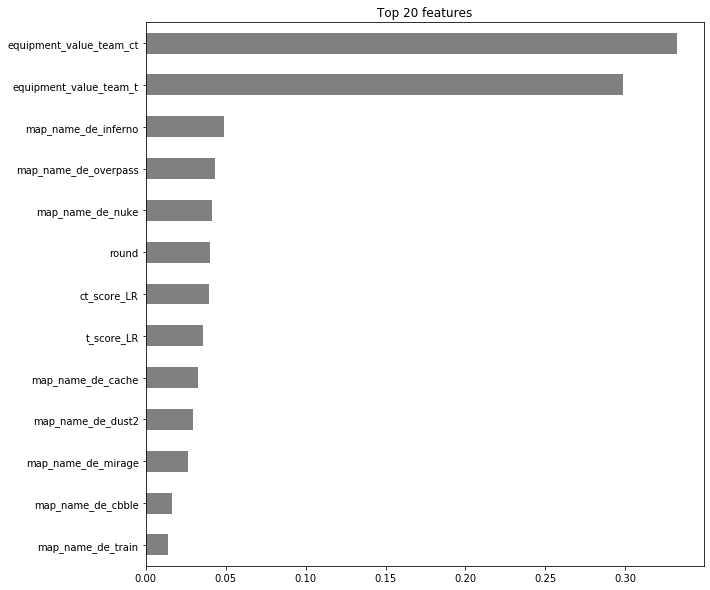

In [242]:
# Get feature importances
xgb = pipeline.named_steps['xgbclassifier']
ohe = pipeline.named_steps['onehotencoder']


importances = pd.Series(xgb.feature_importances_, ohe.feature_names)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [243]:
# for column in X_test.columns:
#     # Fit without column
#     pipeline = make_pipeline(
#         ce.OneHotEncoder(use_cat_names=True), 
#         XGBClassifier(max_depth=4, n_estimators=200,n_jobs=-1, random_state=1337,eval_set=eval_set,eval_metric='auc',early_stopping_rounds=100)
#     )
#     pipeline.fit(X_train.drop(columns=column), y_train)
#     score_without = pipeline.score(X_val.drop(columns=column), y_val)
#     print(f'Validation Accuracy without {column}: {score_without}')

#     # Fit with column
#     pipeline = make_pipeline(
#         ce.OneHotEncoder(use_cat_names=True), 
#         XGBClassifier(max_depth=4, n_estimators=200,n_jobs=-1, random_state=1337,eval_set=eval_set,eval_metric='auc',early_stopping_rounds=100)
#     )
#     pipeline.fit(X_train, y_train)
#     score_with = pipeline.score(X_val, y_val)
#     print(f'Validation Accuracy with {column}: {score_with}')

#     # Compare the error with & without column
#     print(f'Drop-Column Importance for {column}: {score_with - score_without}')
#     print('\n')
#     print('\n')

In [244]:
model = XGBClassifier(max_depth=3, 
                  n_estimators=200,
                  n_jobs=-1,
                  learning_rate=0.02,
                  random_state=1337,
                  eval_set=eval_set,
                  eval_metric='auc',
                  early_stopping_rounds=25)

transformers = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True)
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)
X_test_transformed = transformers.transform(X_test)


model.fit(X_train_transformed,y_train)

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=10, 
    random_state=1337
)



#oldmodel
#model = XGBClassifier(max_depth=4, n_estimators=100,n_jobs=-1, random_state=1337,eval_set=eval_set,eval_metric='auc',early_stopping_rounds=50)



#dropping pistol rounds for PDP/PI analysis
PI_X_train_transformed = X_train_transformed.fillna(0)
PI_X_val_transformed = X_val_transformed.fillna(0)
PI_X_test_transformed = X_test_transformed.fillna(0)


permuter.fit(PI_X_val_transformed, y_val)
feature_names = PI_X_val_transformed.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1178 ± 0.0094,equipment_value_team_ct
0.0582 ± 0.0075,equipment_value_team_t
0.0029 ± 0.0041,t_score_LR
0.0006 ± 0.0026,round
0.0003 ± 0.0013,ct_score_LR
0.0002 ± 0.0008,map_name_de_nuke
0.0001 ± 0.0003,map_name_de_cache
0 ± 0.0000,map_name_de_cbble
0 ± 0.0000,map_name_de_mirage
0 ± 0.0000,map_name_de_train


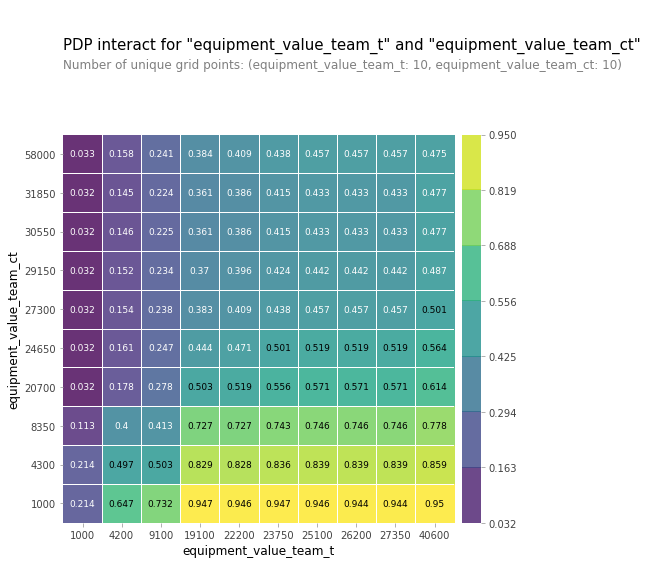

In [245]:


features = ['equipment_value_team_t','equipment_value_team_ct']

interaction = pdp_interact(
    model=model, 
    dataset=PI_X_val_transformed, 
    model_features=PI_X_val_transformed.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

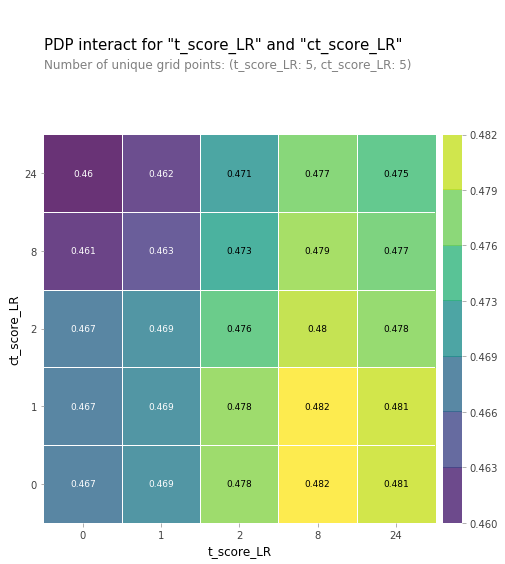

In [246]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['t_score_LR','ct_score_LR']

interaction = pdp_interact(
    model=model, 
    dataset=PI_X_val_transformed, 
    model_features=PI_X_val_transformed.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [247]:
X_test_transformed.columns

Index(['round', 'equipment_value_team_t', 'equipment_value_team_ct',
       'ct_score_LR', 't_score_LR', 'map_name_de_dust2', 'map_name_de_train',
       'map_name_de_inferno', 'map_name_de_nuke', 'map_name_de_cache',
       'map_name_de_mirage', 'map_name_de_overpass', 'map_name_de_cbble'],
      dtype='object')

In [248]:
maps = ['map_name_de_nuke', 'map_name_de_dust2','map_name_de_mirage','map_name_de_overpass','map_name_de_inferno','map_name_de_cbble','map_name_de_cache','map_name_de_train']

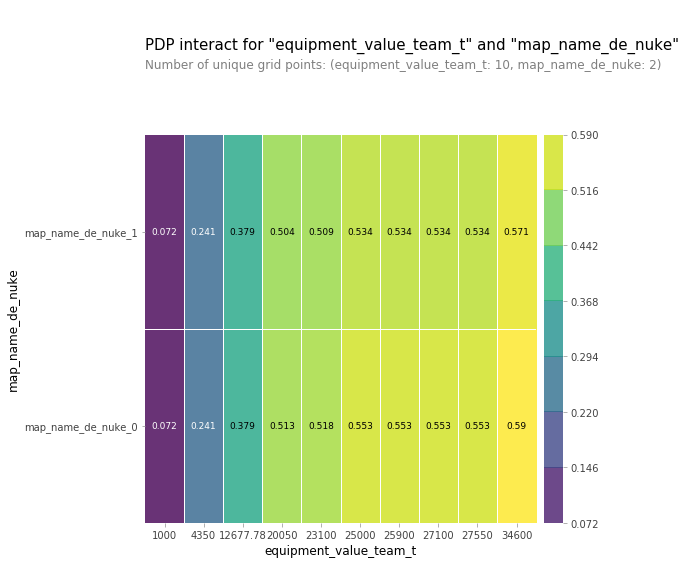

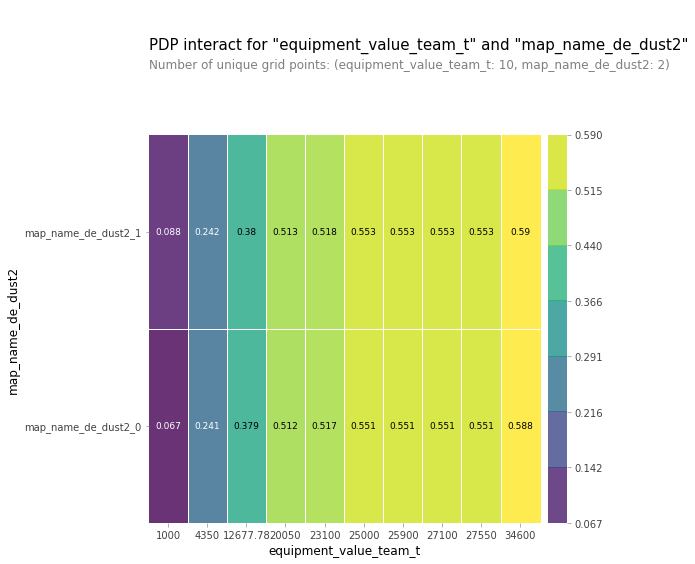

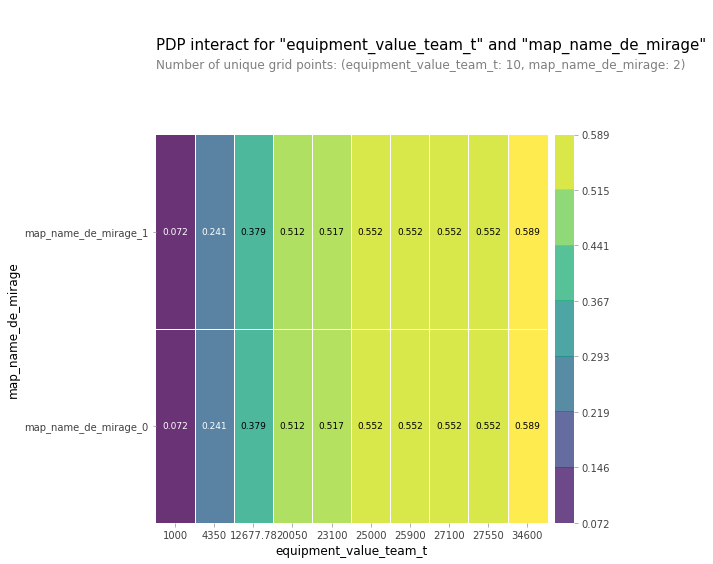

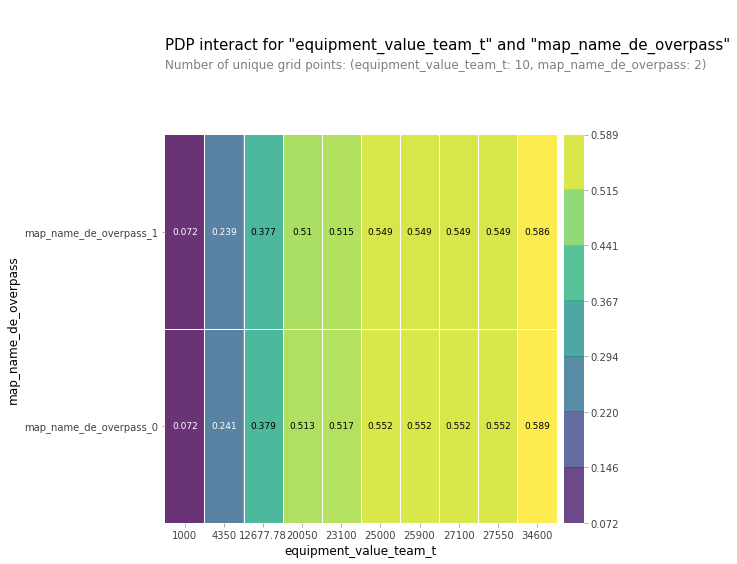

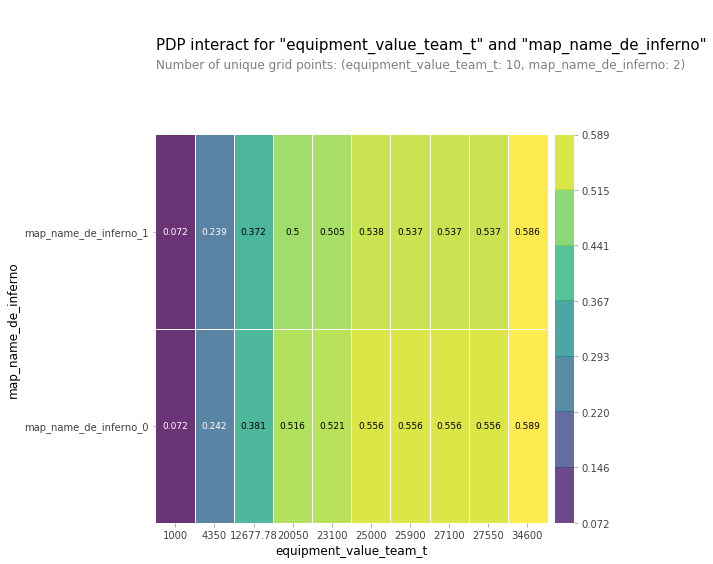

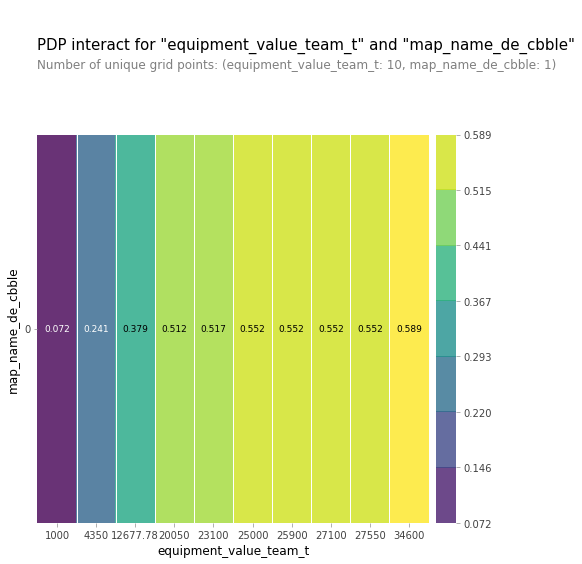

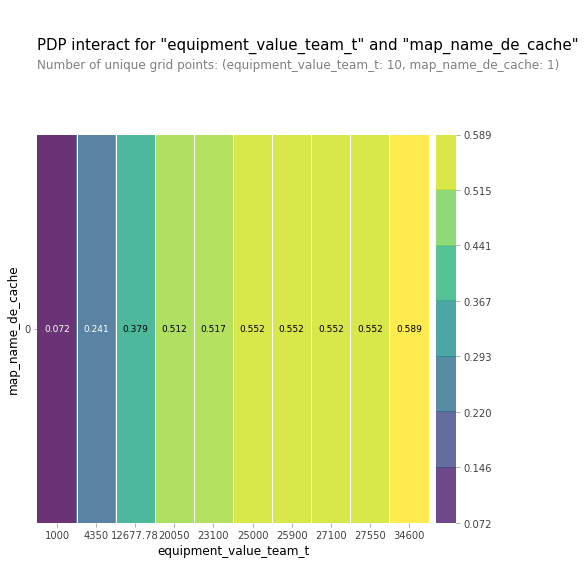

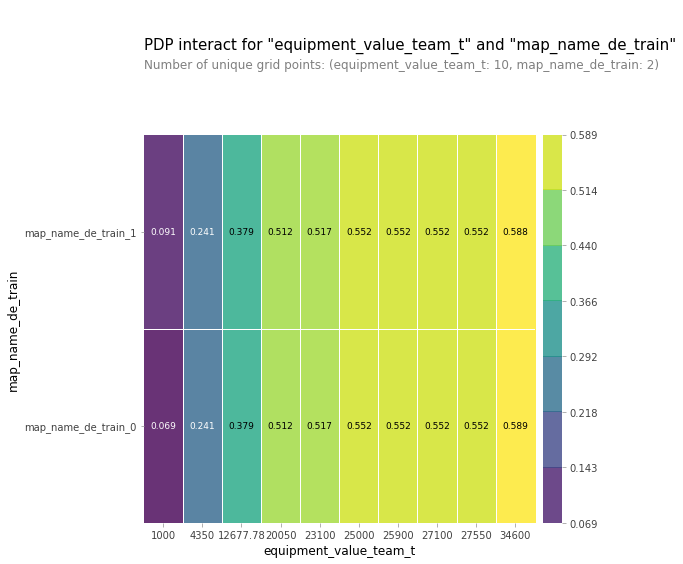

In [249]:
for amap in maps:

    features = ['equipment_value_team_t',amap]

    interaction = pdp_interact(
        model=model, 
        dataset=PI_X_test_transformed, 
        model_features=PI_X_test_transformed.columns, 
        features=features
    )

    pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [250]:
eval_set = [(X_train,y_train),(X_val,y_val)]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    XGBClassifier(max_depth=4, n_estimators=100,n_jobs=-1, random_state=1337,eval_set=eval_set,eval_metric='auc',early_stopping_rounds=50)
)

pipeline.fit(X_train,y_train);

In [251]:
model = pipeline[-1]       # get the last step in the pipeline
processor = pipeline[:-1]  # get all steps except for the last step

In [252]:
row = X_test.iloc[[10]]

In [253]:
test_df['winner_side'].mean()

0.4693200663349917

In [254]:

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
print("Expected value is:"+str(explainer.expected_value)),
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row_processed
)

Expected value is:-0.14634593


In [255]:
test_df['y_pred_proba'] = model.predict_proba(X_test_transformed)[:, 1]

In [256]:
df_evaluate = pd.DataFrame({
    'index': test_df.index, 
    'pred_proba': test_df['y_pred_proba'], 
    't_win': test_df['winner_side']
})


In [257]:
X_test_index = X_test.reset_index()

In [258]:
df_evaluate

,index,pred_proba,t_win
0,0,0.510369,1.0
1,1,0.690415,1.0
2,2,0.949354,1.0
3,3,0.592425,1.0
4,4,0.755060,0.0
5,5,0.301875,0.0
6,6,0.175326,0.0
7,7,0.464064,0.0
8,8,0.141163,0.0
9,9,0.392672,1.0


In [259]:
df_evaluate = df_evaluate.merge(
    X_test_index,
    how='left',
    on='index')

In [266]:
y_test = y_test.reset_index().drop('index',axis=1)

In [275]:
y_test = y_test['winner_side']

In [276]:
df_evaluate

,index,pred_proba,t_win,round,equipment_value_team_t,equipment_value_team_ct,ct_score_LR,t_score_LR,map_name
0,0,0.510369,1.0,1.0,4250.0,4300.0,NaN,NaN,de_overpass
1,1,0.690415,1.0,2.0,19650.0,10050.0,0.0,1.0,de_overpass
2,2,0.949354,1.0,3.0,19850.0,1800.0,0.0,2.0,de_overpass
3,3,0.592425,1.0,4.0,23600.0,28350.0,0.0,3.0,de_overpass
4,4,0.755060,0.0,5.0,25150.0,13100.0,0.0,4.0,de_overpass
5,5,0.301875,0.0,6.0,14050.0,29900.0,1.0,4.0,de_overpass
6,6,0.175326,0.0,7.0,4450.0,31050.0,2.0,4.0,de_overpass
7,7,0.464064,0.0,8.0,24000.0,31350.0,3.0,4.0,de_overpass
8,8,0.141163,0.0,9.0,4650.0,31050.0,4.0,4.0,de_overpass
9,9,0.392672,1.0,10.0,24750.0,30600.0,5.0,4.0,de_overpass


In [277]:
t_win = y_test == 1
ct_win = ~t_win
right = (t_win) == (df_evaluate['pred_proba'] > 0.50)
wrong = ~right



In [281]:
df_evaluate[t_win & right].sort_values(by='pred_proba',ascending=False)

,index,pred_proba,t_win,round,equipment_value_team_t,equipment_value_team_ct,ct_score_LR,t_score_LR,map_name
1966,2082,0.986560,1.0,24.0,20150.0,1300.0,1.0,7.0,de_mirage
1750,1815,0.984450,1.0,17.0,20000.0,1000.0,1.0,7.0,de_overpass
1269,1316,0.983481,1.0,4.0,25150.0,1000.0,0.0,4.0,de_inferno
340,387,0.983150,1.0,7.0,22750.0,1300.0,0.0,3.0,de_train
591,638,0.982560,1.0,19.0,24050.0,1200.0,2.0,3.0,de_train
1177,1224,0.978483,1.0,19.0,26100.0,1000.0,2.0,0.0,de_overpass
1839,1925,0.978348,1.0,7.0,29650.0,1100.0,1.0,5.0,de_inferno
343,390,0.977280,1.0,10.0,21500.0,1100.0,3.0,3.0,de_train
921,968,0.976928,1.0,6.0,27350.0,1000.0,2.0,0.0,de_train
452,499,0.976623,1.0,14.0,27900.0,1000.0,3.0,3.0,de_overpass


In [282]:
df_evaluate[t_win & wrong].sort_values(by='pred_proba',ascending=False)

,index,pred_proba,t_win,round,equipment_value_team_t,equipment_value_team_ct,ct_score_LR,t_score_LR,map_name
44,44,0.499572,1.0,16.0,4450.0,4200.0,9.0,6.0,de_nuke
1630,1695,0.499259,1.0,15.0,28100.0,22150.0,4.0,1.0,de_dust2
1813,1899,0.498790,1.0,7.0,27300.0,29900.0,6.0,10.0,de_mirage
920,967,0.498429,1.0,5.0,22700.0,24550.0,1.0,0.0,de_train
660,707,0.498039,1.0,4.0,23500.0,21000.0,9.0,12.0,de_inferno
2211,2356,0.497623,1.0,12.0,26600.0,31250.0,12.0,12.0,de_mirage
149,173,0.497553,1.0,11.0,19500.0,31250.0,2.0,6.0,de_dust2
2075,2191,0.497399,1.0,2.0,16700.0,11000.0,9.0,7.0,de_train
1424,1471,0.497236,1.0,40.0,27200.0,30600.0,4.0,7.0,de_inferno
46,46,0.497085,1.0,18.0,24650.0,23700.0,9.0,8.0,de_nuke


In [283]:
df_evaluate[ct_win & right].sort_values(by='pred_proba',ascending=False)

,index,pred_proba,t_win,round,equipment_value_team_t,equipment_value_team_ct,ct_score_LR,t_score_LR,map_name
1106,1153,0.499572,0.0,16.0,4650.0,4100.0,10.0,5.0,de_nuke
288,312,0.498751,0.0,21.0,20300.0,27000.0,0.0,3.0,de_mirage
1956,2072,0.498037,0.0,14.0,27050.0,30300.0,7.0,14.0,de_mirage
1406,1453,0.497923,0.0,22.0,28000.0,30600.0,11.0,3.0,de_inferno
2299,2465,0.497718,0.0,23.0,26300.0,31300.0,2.0,9.0,de_mirage
1981,2097,0.497701,0.0,12.0,25100.0,32150.0,11.0,12.0,de_mirage
2607,2800,0.496996,0.0,41.0,29800.0,30000.0,NaN,NaN,de_dust2
948,995,0.496497,0.0,10.0,27700.0,30150.0,14.0,15.0,de_mirage
92,116,0.496202,0.0,36.0,28550.0,22650.0,0.0,2.0,de_mirage
755,802,0.495607,0.0,15.0,28250.0,29250.0,8.0,4.0,de_train


In [284]:
df_evaluate[ct_win & wrong].sort_values(by='pred_proba',ascending=False)

,index,pred_proba,t_win,round,equipment_value_team_t,equipment_value_team_ct,ct_score_LR,t_score_LR,map_name
743,790,0.955444,0.0,3.0,20450.0,1600.0,NaN,NaN,de_train
1330,1377,0.946688,0.0,19.0,21550.0,1500.0,10.0,6.0,de_inferno
2334,2500,0.927365,0.0,3.0,22400.0,3650.0,1.0,5.0,de_inferno
2387,2553,0.894812,0.0,8.0,29900.0,3700.0,3.0,8.0,de_dust2
2246,2391,0.888110,0.0,6.0,27350.0,1900.0,5.0,6.0,de_mirage
1890,2006,0.882239,0.0,8.0,27200.0,5900.0,2.0,6.0,de_nuke
1356,1403,0.869785,0.0,24.0,27450.0,2850.0,8.0,10.0,de_inferno
2402,2568,0.859335,0.0,23.0,18500.0,4850.0,0.0,1.0,de_dust2
345,392,0.856960,0.0,12.0,27750.0,4050.0,3.0,5.0,de_train
263,287,0.855619,0.0,18.0,23550.0,6250.0,9.0,10.0,de_dust2


In [285]:
from joblib import dump
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [214]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
scikit-learn==0.21.3
pandas==0.23.4
numpy==1.16.5
matplotlib==3.1.0
ipywidgets==7.5.1
eli5==0.10.1
